In [4]:
!pip install kmodes


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.metrics import silhouette_score
from kmodes.kmodes import KModes
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

df = pd.read_csv("cluster_ipl.csv")
df.head()


,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.0,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.0,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.0,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.0,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.0,0,0,0,0


In [6]:
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)
df = df.dropna()

Missing values:
PLAYER    0
Mat.x     0
Inns.x    0
NO        0
Runs.x    0
HS        0
Avg.x     0
BF        0
SR.x      0
X100      0
X50       0
X4s       0
X6s       0
Mat.y     0
Inns.y    0
Ov        0
Runs.y    0
Wkts      0
BBI       0
Avg.y     0
Econ      0
SR.y      0
X4w       0
X5w       0
y         0
dtype: int64


In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,1,10,9,1,134,46,22,100,134.00,0,...,0.0,0,0,0,1,0.0,1,0,0,0
1,0,12,11,2,480,90,81,275,174.54,0,...,0.0,0,0,0,1,0.0,1,0,0,0
2,2,3,3,2,63,46,87,33,190.90,0,...,0.0,0,0,0,1,0.0,1,0,0,0
3,3,15,14,1,370,65,51,313,118.21,0,...,0.0,0,0,0,1,0.0,1,0,0,0
4,5,6,6,0,148,45,40,118,125.42,0,...,0.0,0,0,0,1,0.0,1,0,0,0


In [8]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()


,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,-1.695756,0.448003,0.544917,-0.155060,0.009438,0.403235,-0.336148,0.041480,0.610442,-0.160046,...,-0.855674,-0.896204,-0.786099,0.0,-0.873187,-1.320607,-0.866839,-0.181724,-0.083918,0.0
1,-1.719981,0.778232,0.909896,0.460873,1.988078,1.784377,1.577536,1.501449,1.215811,-0.160046,...,-0.855674,-0.896204,-0.786099,0.0,-0.873187,-1.320607,-0.866839,-0.181724,-0.083918,0.0
2,-1.671530,-0.707798,-0.550021,0.460873,-0.396584,0.403235,1.772148,-0.517479,1.460109,-0.160046,...,-0.855674,-0.896204,-0.786099,0.0,-0.873187,-1.320607,-0.866839,-0.181724,-0.083918,0.0
3,-1.647305,1.273575,1.457365,-0.155060,1.359030,0.999637,0.604476,1.818470,0.374656,-0.160046,...,-0.855674,-0.896204,-0.786099,0.0,-0.873187,-1.320607,-0.866839,-0.181724,-0.083918,0.0
4,-1.598855,-0.212455,-0.002552,-0.770993,0.089498,0.371846,0.247688,0.191648,0.482320,-0.160046,...,-0.855674,-0.896204,-0.786099,0.0,-0.873187,-1.320607,-0.866839,-0.181724,-0.083918,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

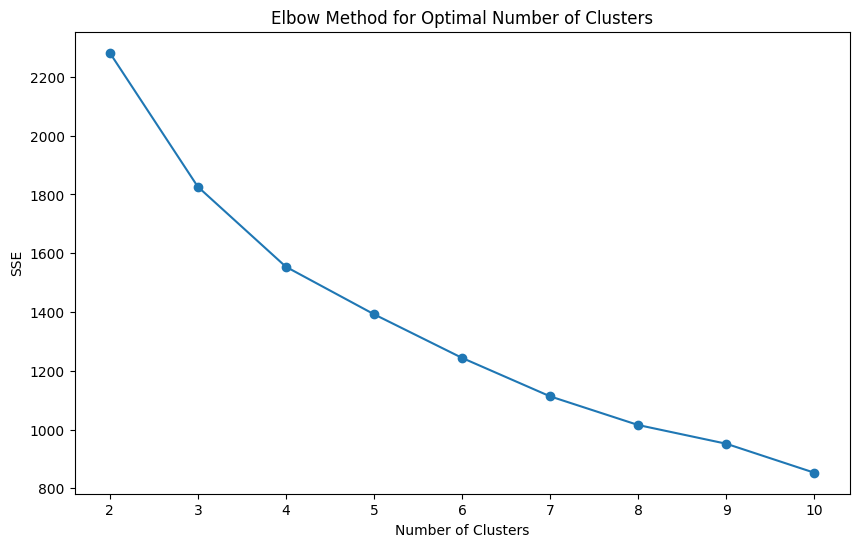

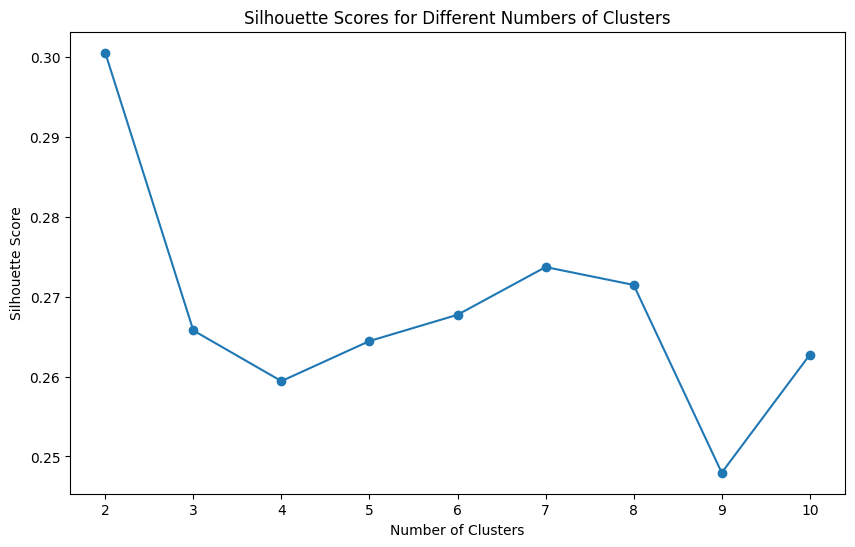

In [9]:
sse = [] # Sum of Squared Errors. It quantifies the sum of squared distances between data points and their assigned cluster centroids
silhouette_scores = [] # It is calculated after clustering to evaluate the cohesion and separation of clusters. It measures how well-separated the clusters are and ranges from -1 to 1, with higher values indicating better-defined clusters.
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# Plot the elbow curve - The point where the SSE starts decreasing at a slower rate (forming an "elbow" shape) can be considered as an indication of the optimal number of clusters.
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


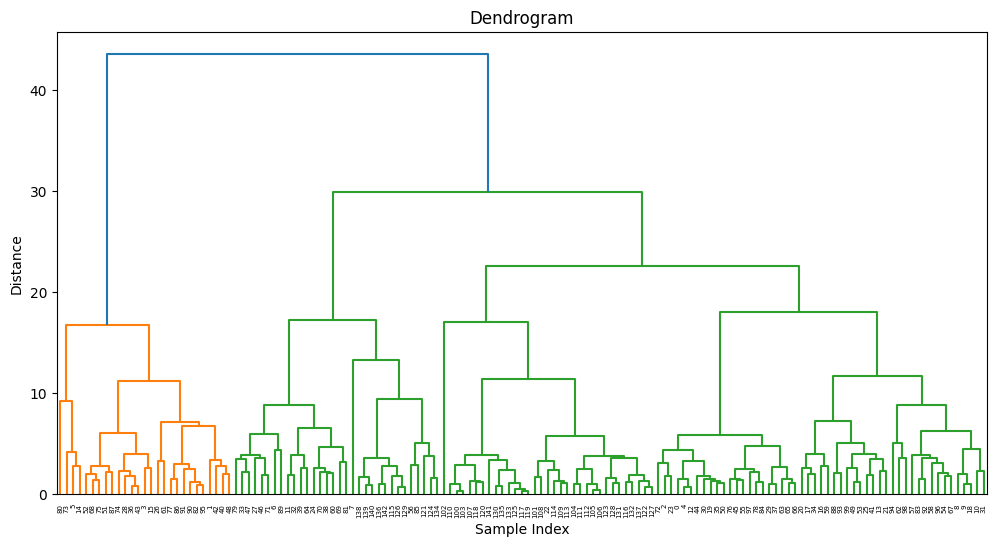

Silhouette Score: 0.2586509899529328
Cophenetic Correlation Coefficient: 0.6316166437997536


In [14]:
distance_matrix = pdist(df)

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Compute cluster labels
n_clusters = 3  # Define the number of clusters
cluster_labels = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward').fit_predict(df)

# Compute silhouette score
silhouette_avg = silhouette_score(df, cluster_labels)

# Compute cophenetic correlation coefficient
c, coph_dists = cophenet(Z, distance_matrix)

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

print("Silhouette Score:", silhouette_avg)
print("Cophenetic Correlation Coefficient:", c)

In [13]:
from sklearn.cluster import AgglomerativeClustering

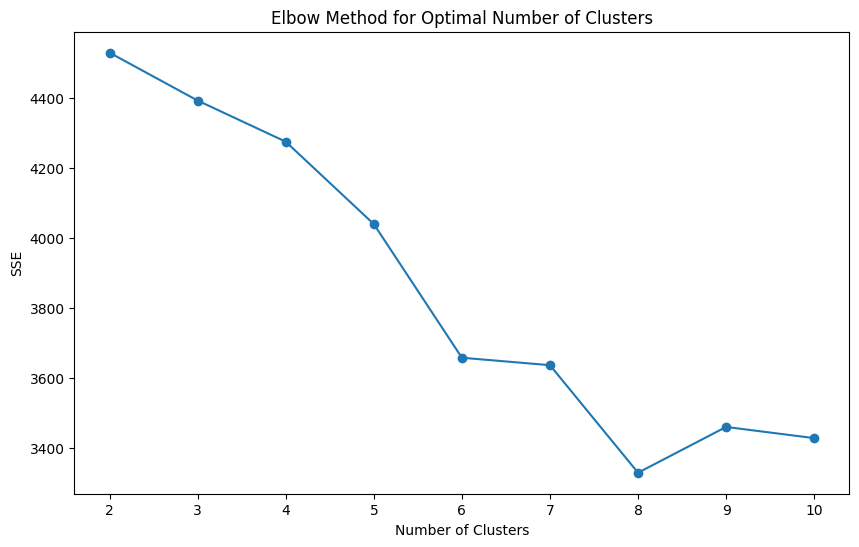

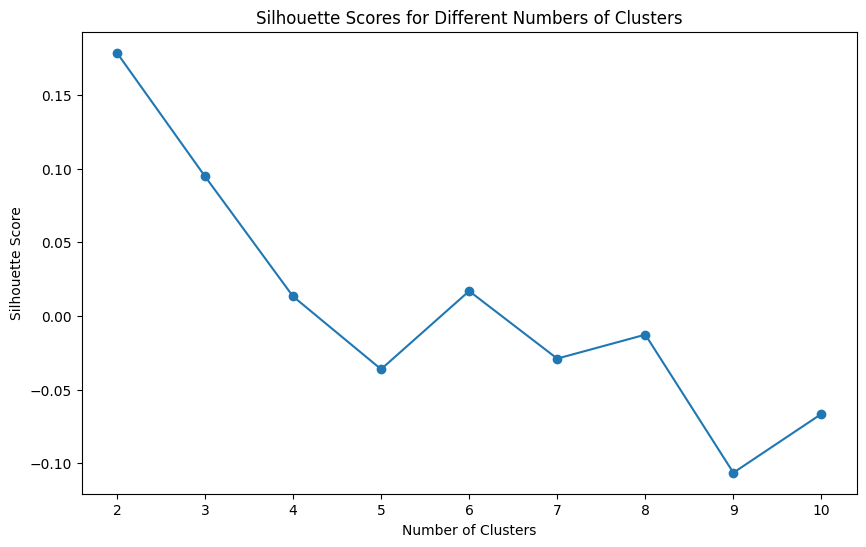

In [15]:
sse = []
silhouette_scores = []
for k in range(2, 11):
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    clusters = km.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, clusters))
    # Approximate SSE
    cluster_modes = km.cluster_centroids_
    sse.append(sum([np.sum((df.values[clusters == i] - cluster_modes[i]) ** 2) for i in range(len(cluster_modes))]))

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()